In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from collections import Counter

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

In [206]:
pd.set_option('display.max_columns',81)
df=pd.read_excel("house_train.xlsx")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [3]:
df_test= pd.read_excel('house_test.xlsx')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Following are the Attributes and their list out discriptions

In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1168.0,102.310078,182.047152,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


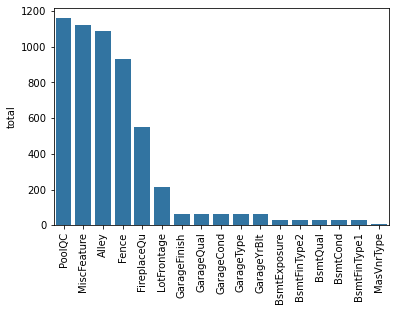

In [216]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (total /  df.shape[0]).sort_values(ascending = False)   
missing_data = pd.concat([total, percent], axis = 1, keys = ['total', 'percent'])
missing_data.head(20)
base_color = sns.color_palette()[0]
sns.barplot(data = missing_data, x = missing_data[missing_data['total']>0].index, y = missing_data.loc[missing_data['total']>0, 'total'], color = base_color)
plt.xticks(rotation = 90)
plt.show()

In [5]:
#Linear feet of street connected to property
#we can fill the null values using the median of the data 
print(df['LotFrontage'].unique())
df['LotFrontage'].value_counts()

[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]


60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

In [6]:
print('Median of LotForntage:',df['LotFrontage'].median())
print('Mean of LotForntage:',df['LotFrontage'].mean())
print('As the Median and Mean of the data are closer we are filling the Nan values with Median')
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace= True)                         
df['LotFrontage'].value_counts()                         
                         

Median of LotForntage: 70.0
Mean of LotForntage: 70.98846960167715
As the Median and Mean of the data are closer we are filling the Nan values with Median


70.0     272
60.0     111
80.0      60
75.0      46
50.0      44
        ... 
102.0      1
168.0      1
38.0       1
140.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

In [7]:
#The total availbel data from the is too Less(77 of 1168) to consider Filling Nan values
#Alley: Type of alley access to property

       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access
#We have a Catagory NA for No alley Access so we are filling Nan Values with NA Catagory Value 
print(df['Alley'].unique())
print(df['Alley'].value_counts())
df['Alley'].fillna('NA',inplace= True)      #Filling Missing Values with NA Catagory 

[nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


In [8]:
#Masonry veneer type
#We are filling the Nan Valus with Mode of the data 
print(df['MasVnrType'].unique())
print(df['MasVnrType'].value_counts())
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace= True)       #Filling missing values with Mode of the data

['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


In [209]:
#Masonry veneer area in square feet
#We are filling the Nan Values with Mean of the data
print(df['MasVnrArea'].value_counts())
print('Mean of the Data:',df['MasVnrArea'].mean())
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace= True)         #Filling missing values with Mean of the data

0.000000      692
102.310078      7
72.000000       7
120.000000      6
180.000000      6
             ... 
67.000000       1
571.000000      1
975.000000      1
275.000000      1
137.000000      1
Name: MasVnrArea, Length: 284, dtype: int64
Mean of the Data: 102.31007751937983


In [10]:
#BsmtQual: Evaluates the height of the basement

       #Ex:Excellent (100+ inches)
       #Gd:Good (90-99 inches)
       #TA:Typical (80-89 inches)
       #Fa:Fair (70-79 inches)
       #Po:Poor (<70 inches
       #NA:No Basement
#We have a catagory called No Basement So we are going to fill the Nan Values with NA: No Basement        
print(df['BsmtQual'].unique())
print(df['BsmtQual'].value_counts())
df['BsmtQual'].fillna('NA',inplace= True)                 #filling Nan Values with NA Catagory

['Gd' 'TA' 'Ex' nan 'Fa']
TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


In [11]:
#BsmtCond: Evaluates the general condition of the basement

       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NA	No Basement
#We have a catagory called No Basement So we are going to fill the Nan Values with NA: No Basement        
print(df['BsmtCond'].unique())
print(df['BsmtCond'].value_counts())
df['BsmtCond'].fillna('NA',inplace= True)             #filling Nan Values with NA Catagory

['TA' 'Gd' 'Fa' nan 'Po']
TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


In [12]:
#BsmtExposure: Refers to walkout or garden level walls

       #Gd	Good Exposure
       #Av	Average Exposure (split levels or foyers typically score average or above)	
       #Mn	Mimimum Exposure
       #No	No Exposure
       #NA	No Basement
#We have a catagory called No Basement So we are going to fill the Nan Values with NA: No Basement        
print(df['BsmtExposure'].unique())
print(df['BsmtExposure'].value_counts())
df['BsmtExposure'].fillna('NA',inplace= True)                #filling Nan Values with NA Catagory


['No' 'Gd' 'Av' 'Mn' nan]
No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


In [13]:
#BsmtFinType1: Rating of basement finished area

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
#We have a catagory called No Basement So we are going to fill the Nan Values with NA: No Basement        
print(df['BsmtFinType1'].unique())
print(df['BsmtFinType1'].value_counts())
df['BsmtFinType1'].fillna('NA',inplace= True)                 #filling Nan Values with NA Catagory


['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


In [14]:
#BsmtFinType2: Rating of basement finished area (if multiple types)

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
#We have a catagory called No Basement So we are going to fill the Nan Values with NA: No Basement        
print(df['BsmtFinType2'].unique())
print(df['BsmtFinType2'].value_counts())
df['BsmtFinType2'].fillna('NA',inplace= True)                  #filling Nan Values with NA Catagory


['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


In [15]:
#FireplaceQu: Fireplace quality

       #Ex:Excellent - Exceptional Masonry Fireplace
       #Gd:Good - Masonry Fireplace in main level
       #TA:Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa:Fair - Prefabricated Fireplace in basement
       #Po:Poor - Ben Franklin Stove
       #NA:No Fireplace
#We have An Catagory of NA:No Fireplace so we are replacing Nan Values with NA   
#infor About Number
print(df['Fireplaces'].unique())
print(df['Fireplaces'].value_counts(),'\n')
print('We have An Catagory of NA:No Fireplace so we are replacing Nan Values with NA','\n\n')
#Info About Qulity 
print(df['FireplaceQu'].unique())
print(df['FireplaceQu'].value_counts())
df['FireplaceQu'].fillna('NA',inplace= True)

[1 0 2 3]
0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64 

We have An Catagory of NA:No Fireplace so we are replacing Nan Values with NA 


['TA' 'Gd' nan 'Fa' 'Ex' 'Po']
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


In [16]:
#GarageType: Garage location
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage
#We Have a catagory of NA where it implies No Garage and there are equal no of missing Nan Values in 
#Columns 
#GarageType
#GarageFinish
#GarageQual
#GarageCond
#So We are Replacing the following columns with NA
print(df['GarageType'].unique())
print(df['GarageType'].value_counts())
df['GarageType'].fillna('NA',inplace= True)
df['GarageFinish'].fillna('NA',inplace= True)
df['GarageQual'].fillna('NA',inplace= True)
df['GarageCond'].fillna('NA',inplace= True)
#GarageYrBlt
# And 0 in the place of the year in Following GarageYrBlt
df['GarageYrBlt'].fillna(0.0,inplace= True)

['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


In [17]:
print(df['GarageYrBlt'].unique())
print(df['GarageYrBlt'].value_counts())

[1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 2001. 1988. 1950. 1961. 1953. 2010. 1922. 1939. 2005.
 1991. 1979. 1975. 1976. 1978. 1960. 1956. 2004. 1982. 2000. 1948.    0.
 1964. 1920. 1930. 1968. 1946. 1992. 1936. 1967. 1989. 1959. 1966. 1916.
 1941. 1998. 1962. 1926. 1925. 1983. 1999. 1969. 1985. 1993. 2008. 1971.
 1980. 1945. 1995. 1981. 1994. 1949. 1996. 1921. 1963. 1938. 1958. 1935.
 1940. 1990. 1910. 1954. 1927. 2009. 1986. 1929. 1984. 1973. 1924. 1942.
 1900. 1931. 1951. 1934. 1972. 1932. 1928. 1918. 1908. 1933. 1906. 1914.
 1952. 1915.]
0.0       64
2006.0    52
2005.0    51
2007.0    40
2003.0    37
          ..
1933.0     1
1900.0     1
1927.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


In [18]:
#PoolQC: Pool quality

       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool
#We Have a catagory of NA where it implies No Pool and there are equal no of 0's in PoolArea Values in    
print(df['PoolArea'].unique())
print(df['PoolArea'].value_counts())
df['PoolQC'].fillna('NA',inplace= True)                 #filling Nan values with NA

[  0 555 576 738 519 480 648 512]
0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


In [19]:
#Fence: Fence quality

       #GdPrv	Good Privacy
       #MnPrv	Minimum Privacy
       #GdWo	Good Wood
       #MnWw	Minimum Wood/Wire
       #NA	No Fence

#MiscFeature: Miscellaneous feature not covered in other categories

       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
print(df['Fence'].unique())
print(df['Fence'].value_counts(),'\n')

print(df['MiscFeature'].unique())
print(df['MiscFeature'].value_counts())
# We are filling Missing Values with NA as we have that as a catagory in following columns 
df['Fence'].fillna('NA',inplace= True) 
df['MiscFeature'].fillna('NA',inplace= True)   

[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64 

[nan 'Shed' 'Gar2' 'TenC' 'Othr']
Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [21]:
#Test Data Cleaning and filling the Nan Values
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace= True)#Filling missing values with Median of the data
df_test['Alley'].fillna('NA',inplace= True)                                 #Filling Nan Values with NA Catagory
df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],inplace= True) #Filling missing values with Mode of the data
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(),inplace= True)    #Filling missing values with Mean of the data
df_test['BsmtQual'].fillna('NA',inplace= True)                           #Filling Nan Values with NA Catagory
df_test['BsmtCond'].fillna('NA',inplace= True)                          #Filling Nan Values with NA Catagory
df_test['BsmtExposure'].fillna('NA',inplace= True)                    #Filling Nan Values with NA Catagory
df_test['BsmtFinType1'].fillna('NA',inplace= True)                   #Filling Nan Values with NA Catagory  
df_test['BsmtFinType2'].fillna('NA',inplace= True)                  #Filling Nan Values with NA Catagory
df_test['FireplaceQu'].fillna('NA',inplace= True)                  #Filling Nan Values with NA Catagory

#Filling Garage Null Values with NA and Year with 0.0
df_test['GarageType'].fillna('NA',inplace= True)                    #Filling Nan Values with NA Catagory
df_test['GarageFinish'].fillna('NA',inplace= True)                 #Filling Nan Values with NA Catagory
df_test['GarageQual'].fillna('NA',inplace= True)                  #Filling Nan Values with NA Catagory
df_test['GarageCond'].fillna('NA',inplace= True)                 #Filling Nan Values with NA Catagory

#GarageYrBlt
# And 0 in the place of the year in Following GarageYrBlt
df_test['GarageYrBlt'].fillna(0.0,inplace= True)

df_test['PoolQC'].fillna('NA',inplace= True)                 #Filling Nan values with NA
df_test['Fence'].fillna('NA',inplace= True)                 #Filling Nan values with NA
df_test['MiscFeature'].fillna('NA',inplace= True)         #Filling Nan values with NA
df_test['Electrical'].fillna('SBrkr',inplace= True) #Single missing value in the Electrical is replaced with Mode of the data 

In [22]:
print(df['Electrical'].unique())
print(df['Electrical'].value_counts())

['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Data Analysis 

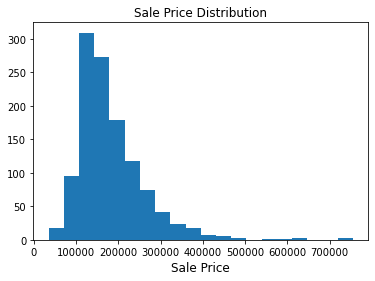

In [217]:
plt.hist(data = df, x = 'SalePrice', bins = 20)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price", fontsize = 12);

Text(0.5, 1.0, 'GrLivArea vs Sale Price')

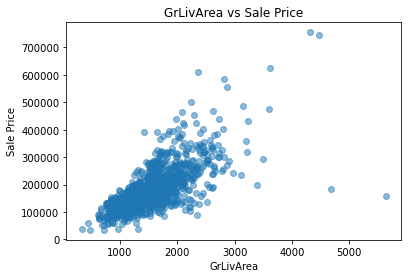

In [218]:
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'], alpha = 0.5)
plt.xlabel("GrLivArea")
plt.ylabel('Sale Price')
plt.title("GrLivArea vs Sale Price")

There are outliers in the Area to maintain divercity we will not remove the out liers 

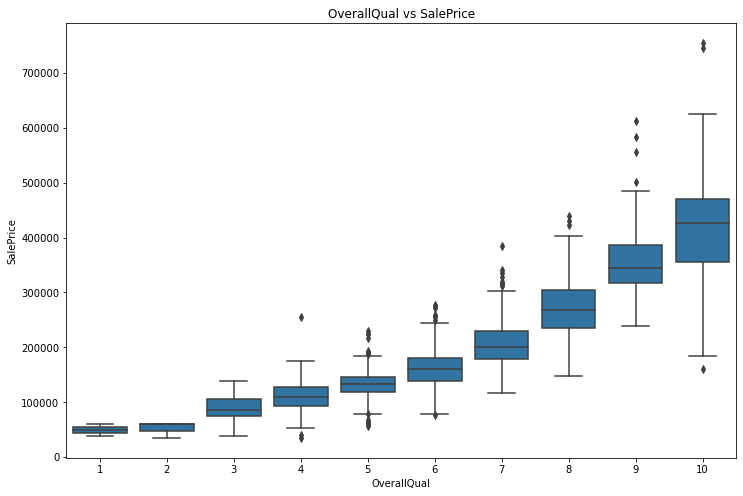

In [220]:
# box plot
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'OverallQual', y = 'SalePrice', color = base_color)
plt.title("OverallQual vs SalePrice")
plt.show()

We can clearly observe that as the OverQual Rating increases the Selleing price also increases 

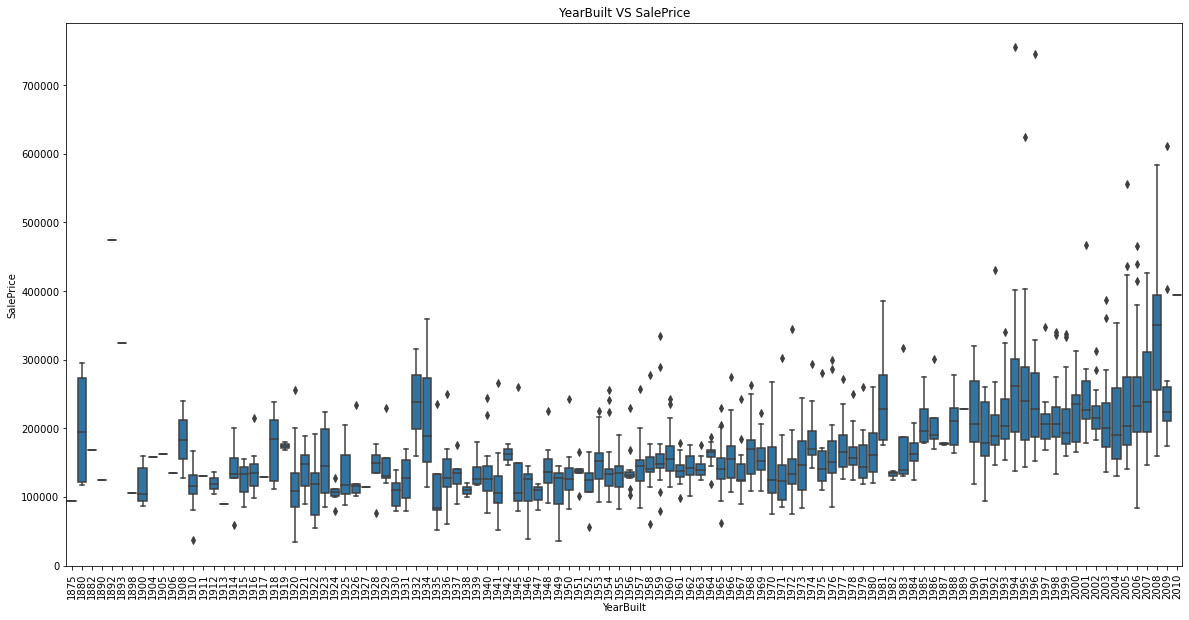

In [222]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = 'YearBuilt', y = 'SalePrice', color = base_color)
plt.title("YearBuilt VS SalePrice")
plt.xticks(rotation = 90)
plt.show()

Year built Positivelt Effects the price of the House

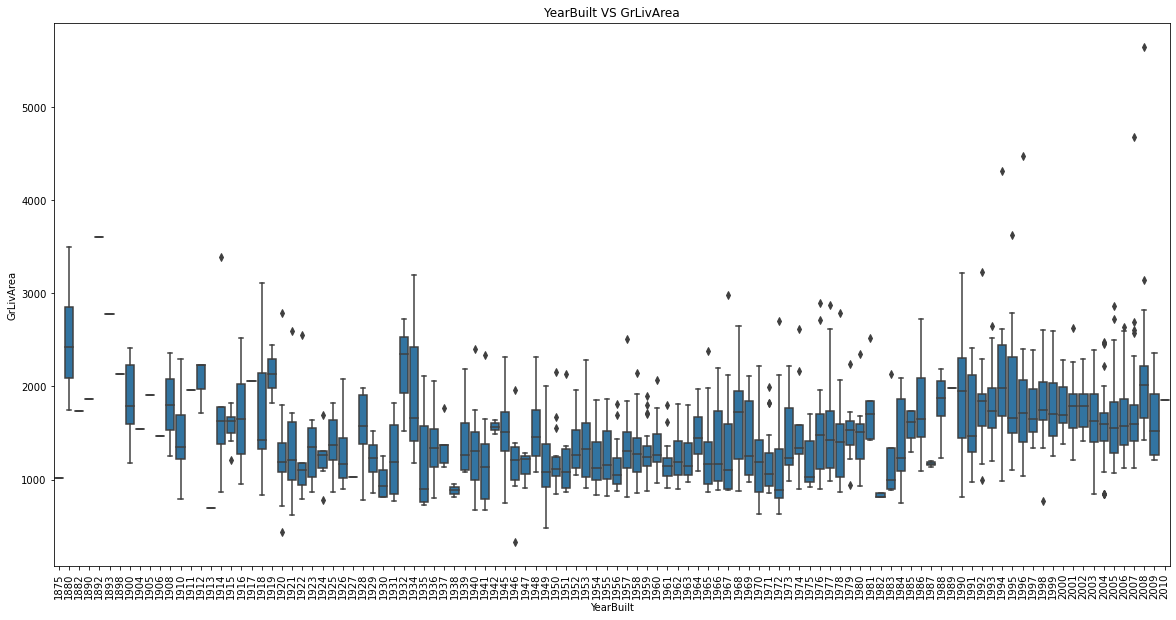

In [243]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, x = 'YearBuilt', y = 'GrLivArea', color = base_color)
plt.title("YearBuilt VS GrLivArea")
plt.xticks(rotation = 90)
plt.show()

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64 



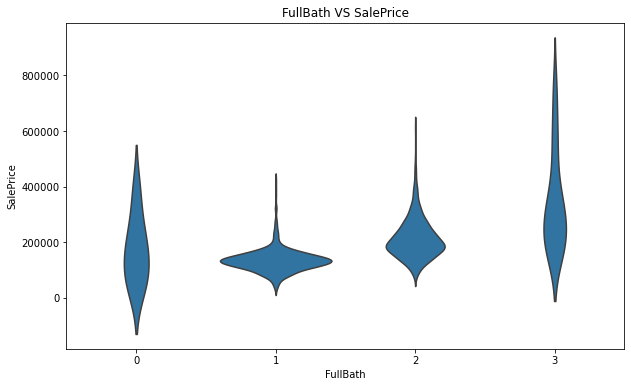

In [224]:
plt.figure(figsize = (10,6))
sns.violinplot(data = df, x = 'FullBath', y = 'SalePrice', color = base_color, inner = None)
plt.title("FullBath VS SalePrice")
print(df['FullBath'].value_counts(),'\n')

#Houses with cost higher than 60,000$ are haveing Fullbath

#Houses with Fullbath 0 mostly are priced low i.e.,between 10,000 - 20,000$

# Encoding the data 

In [49]:
data= df

In [50]:
data_test=df_test

In [51]:
#Using Get Dummies - OneHot Encoding 
Data_OHE=data
categorical_columns = ['MSZoning','Street','Alley','Utilities','LotConfig','Neighborhood',
                                         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                                         'Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']
for col in categorical_columns:
    col_ohe = pd.get_dummies(data[col], prefix=col)
    Data_OHE = pd.concat((Data_OHE, col_ohe), axis=1).drop(col, axis=1)
    
Datatest_OHE=data_test
for col in categorical_columns:
    col_ohe = pd.get_dummies(data_test[col], prefix=col)
    Datatest_OHE = pd.concat((Datatest_OHE, col_ohe), axis=1).drop(col, axis=1)

In [55]:
Data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 218 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), object(21), uint8(159)
memory usage: 719.9+ KB


In [160]:
df_Analysis = df

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_Analysis[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope' ,'Neighborhood',
                                         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                         'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
                                       'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']] = df_Analysis[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope' ,'Neighborhood',
                                         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                                         'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
                                       'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition' ]].apply(le.fit_transform)
df_Analysis

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.0,4928,1,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,4,4,0,120,6,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,2,2,440,5,5,2,0,205,0,0,0,0,3,4,1,0,2,2007,8,4,128000
1,889,20,3,95.0,15865,1,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,4,1,1,0,351,5,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,3,2,621,5,5,2,81,207,0,0,224,0,3,4,1,0,10,2007,8,4,268000
2,793,60,3,92.0,9920,1,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,4,0,2,862,6,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,3,2,455,5,5,2,180,130,0,0,0,0,3,4,1,0,6,2007,8,4,269790
3,110,20,3,105.0,11751,1,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,4,4,1,705,6,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,2,2,546,5,5,2,0,122,0,0,0,0,3,2,1,0,1,2010,0,4,190000
4,422,20,3,70.0,16635,1,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,4,4,0,1246,6,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529,5,5,2,240,0,0,0,0,0,3,4,1,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3,70.0,9819,1,1,0,3,0,4,0,19,2,2,0,2,5,5,1967,1967,1,1,7,7,1,31.0,3,2,1,4,4,4,1,450,6,0,432,882,1,4,1,4,900,0,0,900,0,0,1,0,3,1,3,5,6,0,3,5,1970.0,3,1,280,5,5,2,0,0,0,0,0,0,3,2,1,0,2,2010,8,4,122000
1164,554,20,3,67.0,8777,1,1,3,3,0,4,0,7,1,2,0,2,4,5,1949,2003,1,1,11,12,2,0.0,3,4,1,3,2,3,4,0,4,0,0,0,1,0,1,4,1126,0,0,1126,0,0,2,0,2,1,2,5,6,0,3,5,2002.0,0,2,520,5,5,0,0,96,0,0,0,0,3,2,1,0,5,2009,8,4,108000
1165,196,160,3,24.0,2280,1,1,3,3,0,2,0,13,2,2,3,5,6,6,1976,1976,1,1,8,2,2,0.0,3,4,1,2,4,4,0,566,6,0,289,855,1,4,1,4,855,601,0,1456,0,0,2,1,3,1,3,7,6,1,5,1,1976.0,3,2,440,5,5,2,87,0,0,0,0,0,3,4,1,0,7,2009,8,4,148500
1166,31,70,0,50.0,8500,1,2,3,3,0,4,0,9,1,2,0,5,4,4,1920,1950,2,1,3,3,2,0.0,3,1,0,4,4,4,6,0,6,0,649,649,1,4,0,4,649,668,0,1317,0,0,1,0,3,1,3,6,6,0,3,5,1920.0,3,1,250,5,1,0,0,54,172,0,0,0,3,2,1,0,7,2008,8,4,40000


OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
                  ...   
GarageFinish   -0.424922
KitchenQual    -0.592468
BsmtQual       -0.601307
ExterQual      -0.624820
Utilities            NaN
Length: 80, dtype: float64


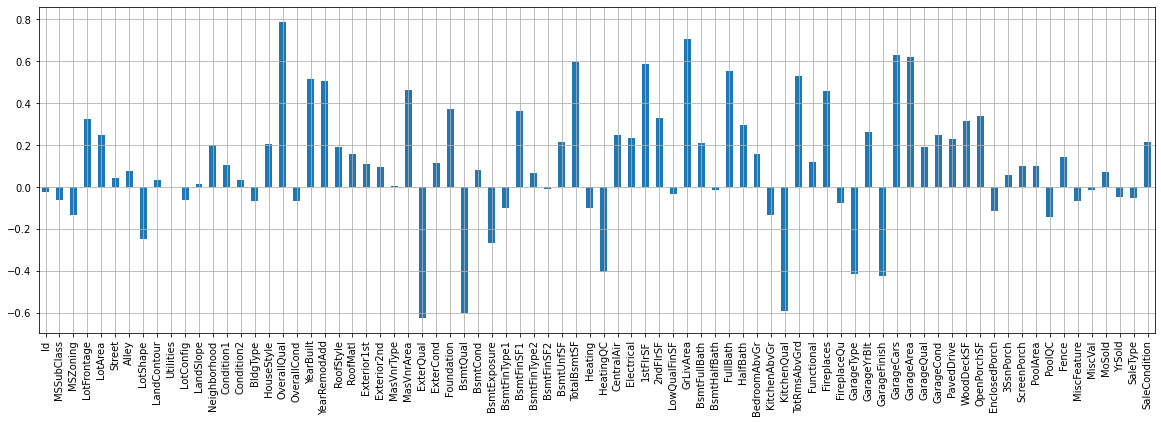

In [181]:
plt.figure(figsize=(20,6))
df_Analysis.drop("SalePrice",axis=1).corrwith(df_Analysis["SalePrice"]).plot(kind="bar",grid=True)
print(df_Analysis.drop("SalePrice",axis=1).corrwith(df_Analysis["SalePrice"]).sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

In [313]:
pd.set_option('display.max_columns',81)
df_na=df_Analysis.drop("SalePrice",axis=1).corrwith(df_Analysis["SalePrice"]).sort_values(ascending=False)

In [318]:
df_na.head(10)
#Positive Correaltion

OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
dtype: float64

In [319]:
df_na.tail(10)
#Negative Correaltion

PoolQC         -0.141136
LotShape       -0.248171
BsmtExposure   -0.267635
HeatingQC      -0.406604
GarageType     -0.415370
GarageFinish   -0.424922
KitchenQual    -0.592468
BsmtQual       -0.601307
ExterQual      -0.624820
Utilities            NaN
dtype: float64

In [56]:
#Ordinal Encoding the Data inputing the Order
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ordinal_orders=[ 
    #LotShape 
['Reg','IR1' ,'IR2','IR3'],
    #LandContor
['Lvl', 'Bnk', 'HLS','Low'],
    #LandSlope
['Gtl','Mod','Sev'],    
    #ExterQual 
['Fa','TA','Gd','Ex'], 
    #ExterCond
['Po','Fa','TA','Gd','Ex'],
    #BsmtQual 
['NA','Fa','TA','Gd','Ex'], 
    #BsmtCond 
['NA','Po','Fa','TA','Gd','Ex'], 
    #BsmtExposure 
['NA','No','Mn','Av','Gd'], 
    #BsmtFinType1 
['NA','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
    #BsmtFinType2 
['NA','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    #HeatingQC 
['Po','Fa','TA','Gd','Ex'],
    #Electrical
['SBrkr','FuseA','FuseF','FuseP','Mix'],    
    #KitchenQual 
['Fa','TA','Gd','Ex'],
    #Functional
['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],    
    #FireplaceQu 
['NA','Po','Fa','TA','Gd','Ex'],
    #GarageFinish
['NA','Fin','RFn','Unf'],    
    #GarageQual 
['NA','Po','Fa','TA','Gd','Ex'], 
    #GarageCond 
['NA','Po','Fa','TA','Gd','Ex'], 
    #PavedDrive
['Y','P','N'],
    #PoolQC
['NA','Fa','Gd','Ex'],    
    #Fence 
['NA','MnWw','GdWo','MnPrv','GdPrv'], 
]

ordi = OrdinalEncoder(categories = ordinal_orders)
ordi.fit(Data_OHE[['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']])

OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3'],
                           ['Lvl', 'Bnk', 'HLS', 'Low'], ['Gtl', 'Mod', 'Sev'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'No', 'Mn', 'Av', 'Gd'],
                           ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev',
                            'Sal'],
                           ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['NA', 'Fin', 'RFn', 

In [58]:
#Transforming the data
trans = pd.DataFrame(ordi.transform(Data_OHE[['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']]))
trans.columns = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

trans_test = pd.DataFrame(ordi.transform(Datatest_OHE[['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']]))
trans_test.columns = ['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']


In [59]:
trans

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,1.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,0.0,0.0
1,1.0,0.0,1.0,2.0,3.0,2.0,4.0,4.0,5.0,3.0,4.0,0.0,2.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
2,1.0,0.0,0.0,2.0,2.0,3.0,3.0,3.0,6.0,1.0,4.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,4.0,1.0,4.0,0.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0
4,1.0,0.0,0.0,2.0,2.0,3.0,3.0,1.0,5.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,3.0
1164,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,2.0,0.0,3.0
1165,0.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,5.0,1.0,2.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0
1166,0.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0


In [60]:
Data_OHE.drop(['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence'],axis=1,inplace=True)
Datatest_OHE.drop(['LotShape','LandContour','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence'],axis=1,inplace=True)


In [61]:
Data_OHE = pd.concat([Data_OHE, trans],axis=1)
Datatest_OHE = pd.concat([Datatest_OHE, trans_test],axis=1)

In [62]:
Data_OHE.drop('Id',axis=1,inplace=True)
Datatest_OHE.drop('Id',axis=1,inplace=True)


In [64]:
# using the same Index for both train and test data 
Datatest_OHE = Datatest_OHE.reindex(columns = Data_OHE.columns, fill_value=0)

In [196]:
#Removing the SalePrice Column from the Test Dataset
Datatest_OHE.drop('SalePrice',axis=1,inplace=True)

In [65]:
print(Data_OHE.info())
print(Datatest_OHE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 217 entries, MSSubClass to Fence
dtypes: float64(24), int64(34), uint8(159)
memory usage: 710.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Columns: 217 entries, MSSubClass to Fence
dtypes: float64(24), int64(63), uint8(130)
memory usage: 235.7 KB
None


# Model Building 

In [321]:
y=Data_OHE["SalePrice"]
x=Data_OHE.drop("SalePrice", axis=1)

In [322]:
x.shape

(1168, 216)

In [323]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [324]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
    if r2_score(y_train,pred_train)*100>max_scr:    
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 91.59272424933347
Testing r2_score is: 64.76992611284827
At random state 31 The model Perfomes very well
Training r2_score is: 92.2919703250492
Testing r2_score is: 83.26097126560086
At random state 32 The model Perfomes very well
Training r2_score is: 91.99182984055003
Testing r2_score is: 84.53753031597209
At random state 33 The model Perfomes very well
Training r2_score is: 91.81136659939517
Testing r2_score is: 87.9084131392073
At random state 34 The model Perfomes very well
Training r2_score is: 91.74557606340488
Testing r2_score is: 49.56616233428045
At random state 35 The model Perfomes very well
Training r2_score is: 91.75295875127296
Testing r2_score is: 58.38359120940672
At random state 36 The model Perfomes very well
Training r2_score is: 92.5980156171916
Testing r2_score is: 79.48561061175423
At random state 37 The model Perfomes very well
Training r2_score is: 91.58365115645532
Testing r2_score is: 88.19

In [297]:
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

In [325]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=89)
num_folds = 10
seed = 89
scoring = 'neg_mean_squared_error'

In [300]:
#Base Models list 
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR())
    ]

In [301]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2*100)
    print(msg)

R2 Score with Lasso: 89.741707 
R2 Score with Linear Regression: 89.574228 
R2 Score with Decision Tree: 79.730873 
R2 Score with Ridge Regression: 87.949643 
R2 Score with KNearest Neighbors: 57.744550 
R2 Score with SVR: -4.589531 


In [302]:
#Lasso and Linear Regression have perfomed best lets go ahead with Parameter tuning 

In [303]:
#Tuning Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model=Lasso()

kfold = KFold(n_splits=10, shuffle=True, random_state=86)
# define grid
grid = dict()
grid['alpha'] = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])
# define search
Reg = GridSearchCV(model, grid, scoring=scoring, cv=kfold, n_jobs =-1)
Reg.fit(x_train,y_train)
print(Reg.best_params_) 

{'alpha': 5.0}


In [235]:
#Fitting the Lasso and Checking the Scores
Ls=Lasso(alpha= 5.0)
Ls.fit(x_train,y_train)
Ls.score(x_train,y_train)
y_predLs = Ls.predict(x_test)

Lsscore=cross_val_score(Ls,x,y,cv=3)
Lsr=Lsscore.mean()
print("Cross value Score:",Lsr*100,'\n')

Lss_MAE = round(MAE(y_test, y_predLs),2)
Lss_MSE = round(MSE(y_test, y_predLs),2)
Lss_R2Score = round(r2_score(y_test,y_predLs),4)

print(f" Mean Absolute Error: {Lss_MAE}\n")
print(f" Mean Squared Error: {Lss_MSE}\n")
print(f" Lasso R2 Score: {Lss_R2Score*100}\n")

Cross value Score: 75.64966389458175 

 Mean Absolute Error: 19682.35

 Mean Squared Error: 760473931.95

 Lasso R2 Score: 89.8



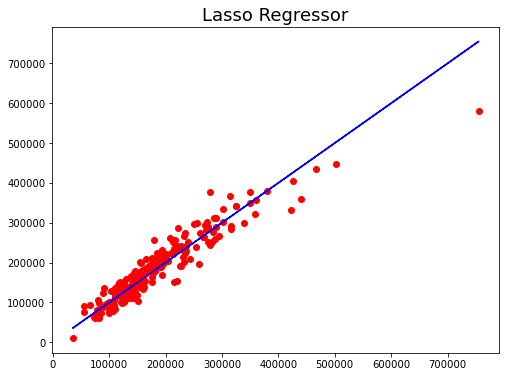

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predLs,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Lasso Regressor",fontsize=18)
plt.show()

In [239]:
#LinearRegressor
LR=LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
y_predLr = LR.predict(x_test)

LRscore=cross_val_score(Ls,x,y,cv=3)
LRr=LRscore.mean()
print("Cross value Score:",LRr*100,'\n')

LRs_MAE = round(MAE(y_test, y_predLr),2)
LRs_MSE = round(MSE(y_test, y_predLr),2)
LRs_R2Score = round(r2_score(y_test,y_predLr),4)

print(f" Mean Absolute Error: {LRs_MAE}\n")
print(f" Mean Squared Error: {LRs_MSE}\n")
print(f" LinearReg R2 Score: {LRs_R2Score*100}\n")

Cross value Score: 75.64966389458175 

 Mean Absolute Error: 19896.38

 Mean Squared Error: 777392877.26

 LinearReg R2 Score: 89.57000000000001



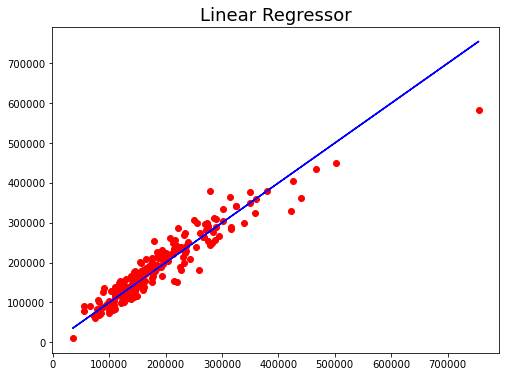

In [238]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predLr,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regressor",fontsize=18)
plt.show()

In [236]:
models= [AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print('R2 Score',r2_score(y_test, predm))
    print('MAE',round(MAE(y_test, predm),2))
    print('MSE',round(MSE(y_test, predm),2))
    print("****************************************************************")
    print("\n")

[AdaBoostRegressor()]:
R2 Score 0.8464100668841575
MAE 25004.74
MSE 1145236238.94
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor()]:
R2 Score 0.9004082250606303
MAE 17591.04
MSE 742601467.73
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]:
R2 Score 0.9198661613230171
MAE 16344.85
MSE 597514265.14
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]:
R2 Score 0.9030595041986053
MAE 17993.76
MSE 722832327.36
****************************************************************




In [326]:
#Gradient Boost Regressor Fitting and Checking the Scores
GBR= GradientBoostingRegressor(criterion = 'mae',learning_rate=0.1, n_estimators=1000,max_depth=3, min_samples_split=2,
                               min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=89)
GBR.fit(x_train, y_train)

predictions = GBR.predict(x_test)
GB_MAE = round(MAE(y_test, predictions),2)
GB_MSE = round(MSE(y_test, predictions),2)
GB_R2Score = round(r2_score(y_test,predictions),4)

print(f" Mean Absolute Error: {GB_MAE}\n")
print(f" Mean Squared Error: {GB_MSE}\n")
print(f" GB Score: {GB_R2Score*100}\n")

 Mean Absolute Error: 15372.12

 Mean Squared Error: 534544208.02

 GB Score: 92.83



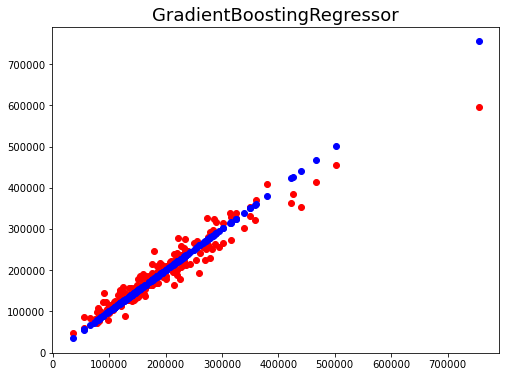

In [327]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions,color='r')
plt.scatter(y_test,y_test,color='b')
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

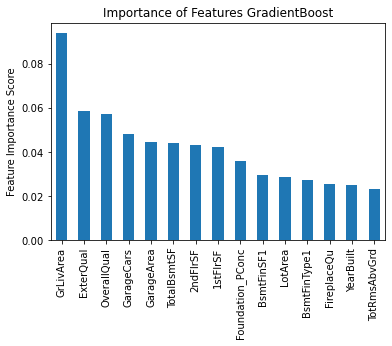

In [328]:
# Important Features used by Gradient Boost for the prediction
predictors1=list(x_train)                                
feat_imp = pd.Series(GBR.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feat_imp.nlargest(15).plot(kind='bar', title='Importance of Features GradientBoost')
plt.ylabel('Feature Importance Score')
#important_features = np.sort(feat_imp)[:20]

In [311]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(x_train,y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'] 
    }

    xgb_model = XGBRegressor()
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=86)
    grid_search = RandomizedSearchCV(xgb_model, param_tuning, scoring="neg_mean_absolute_error", n_iter = 100, cv=kfold)
    grid_result = grid_search.fit(x_train,y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_[ 'mean_test_score' ]
    stds = grid_result.cv_results_[ 'std_test_score' ]
    params = grid_result.cv_results_[ 'params' ]

In [312]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

hyperParameterTuning(x_train,y_train)

Best: -15911.480452 using {'subsample': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


In [315]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.01,
        max_depth = 10,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.5)

xgb_model.fit(x_train,y_train, early_stopping_rounds=5,
              eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)
XGB_R2Score = round(r2_score(y_test,y_pred_xgb),4)
XGB_MAE = round(MAE(y_test, y_pred_xgb),2)
XGB_MSE = round(MSE(y_test, y_pred_xgb),2)


print(f" XGB Score: {XGB_R2Score*100}\n")
print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")


 XGB Score: 91.83

 Mean Absolute Error: 15388.12

 Mean Squared Error: 609304374.75



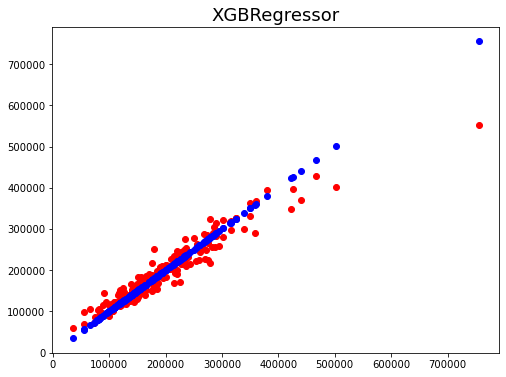

In [316]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred_xgb,color='r')
plt.scatter(y_test,y_test,color='b')

plt.title("XGBRegressor",fontsize=18)
plt.show()

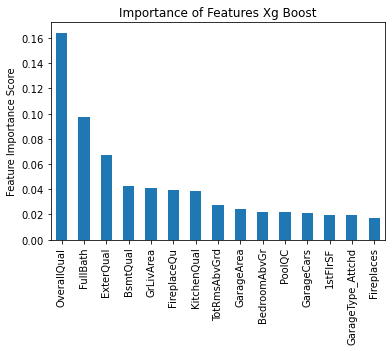

In [231]:
predictors1=list(x_train)                                
feat_imp = pd.Series(xgb_model.feature_importances_, predictors1).sort_values(ascending=False)
feat_imp.nlargest(15).plot(kind='bar', title='Importance of Features Xg Boost')
plt.ylabel('Feature Importance Score')
plt.show()

In [127]:
#Hyperparameter tuning for Random Forest Regressor 
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()

n_estimators= [10,12]
max_features= [5, 10], 
max_depth= [10, None] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 10}


In [242]:
#Fitting and Checking the Scores for RandomeForest Regressor 
rf = RandomForestRegressor(criterion= 'mse', max_depth = 10, n_estimators= 10)
rf.fit(x_train,y_train)
y_pred_RFR = rf.predict(x_test)
RFR_R2Score = round(r2_score(y_test,y_pred_RFR),4)
RFR_MAE = round(MAE(y_test, y_pred_RFR),2)
RFR_MSE = round(MSE(y_test, y_pred_RFR),2)

print(f" Randon Forest Score: {RFR_R2Score*100}\n")
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")

 Randon Forest Score: 89.60000000000001

 Mean Absolute Error: 19313.62

 Mean Squared Error: 775762889.76



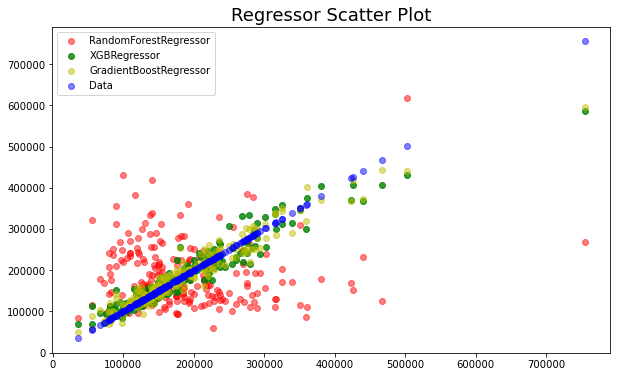

In [191]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=y_predrf,color='r',alpha=0.5,label='RandomForestRegressor')
plt.scatter(x=y_test,y=y_pred_xgb,color='g',alpha=0.8,label='XGBRegressor')
plt.scatter(x=y_test,y=predictions,color='y',alpha=0.5,label='GradientBoostRegressor')
plt.scatter(y_test,y_test,color='b',alpha=0.5)

plt.legend(['RandomForestRegressor','XGBRegressor','GradientBoostRegressor','Data'],loc="upper left")

plt.title("Regressor Scatter Plot",fontsize=18)
plt.show()

# Saving the Model with Gradient Boost Regressor

In [329]:
import pickle
filename="GBRHousecostPred.pkl"
pickle.dump(GBR,open(filename,"wb"))

In [330]:
fit_model=pickle.load(open("GBRHousecostPred.pkl","rb"))

In [331]:
predictions=fit_model.predict(Datatest_OHE)

In [332]:
predictions = pd.DataFrame(predictions,columns=['Predications'])

In [333]:
# Test Data Predictions 
Test_Pred = pd.concat([df_test['Id'],predictions],axis=1)
Test_Pred

,Id,Predications
0,337,363264.712268
1,1018,192239.018482
2,929,251568.932903
3,1148,184972.263019
4,1227,239645.322315
...,...,...
287,83,248361.075887
288,1048,153623.287452
289,17,146886.090950
290,523,149725.416300


# Model with Outliers Removed 

In [280]:
q_hi  = Data_OHE["GrLivArea"].quantile(0.99)

train_out = Data_OHE[(Data_OHE["GrLivArea"] < q_hi)]

In [282]:
q_hi  = Data_OHE["LotArea"].quantile(0.99)

train_out = Data_OHE[(Data_OHE["LotArea"] < q_hi)]

In [284]:
train_out.shape

(1156, 217)

In [249]:
y=train_out["SalePrice"]
x=train_out.drop("SalePrice", axis=1)
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    #if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
    if r2_score(y_train,pred_train)*100>max_scr:    
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 30 The model Perfomes very well
Training r2_score is: 93.01086228451942
Testing r2_score is: 87.05414099867846
At random state 31 The model Perfomes very well
Training r2_score is: 92.76767898053531
Testing r2_score is: 89.7529545863731
At random state 32 The model Perfomes very well
Training r2_score is: 92.84390703063478
Testing r2_score is: 88.35663949970561
At random state 33 The model Perfomes very well
Training r2_score is: 92.85734753540856
Testing r2_score is: 88.89174595356262
At random state 34 The model Perfomes very well
Training r2_score is: 92.66703945869914
Testing r2_score is: 87.58634580088098
At random state 35 The model Perfomes very well
Training r2_score is: 93.71121187194252
Testing r2_score is: 84.56163577346608
At random state 36 The model Perfomes very well
Training r2_score is: 93.37847384941568
Testing r2_score is: 82.81937813867401
At random state 37 The model Perfomes very well
Training r2_score is: 93.09426593263957
Testing r2_score is: 87.

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=89)
num_folds = 10
seed = 89
scoring = 'neg_mean_squared_error'

In [265]:
GBR= GradientBoostingRegressor(learning_rate=0.1, n_estimators=500,max_depth=5, min_samples_split=2,
                               min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=89)
GBR.fit(x_train, y_train)

predictions = GBR.predict(x_test)
GB_MAE = round(MAE(y_test, predictions),2)
GB_MSE = round(MSE(y_test, predictions),2)
GB_R2Score = round(r2_score(y_test,predictions),4)

print(f" Mean Absolute Error: {GB_MAE}\n")
print(f" Mean Squared Error: {GB_MSE}\n")
print(f" GB Score: {GB_R2Score*100}\n")

 Mean Absolute Error: 13632.91

 Mean Squared Error: 351362319.88

 GB Score: 92.62



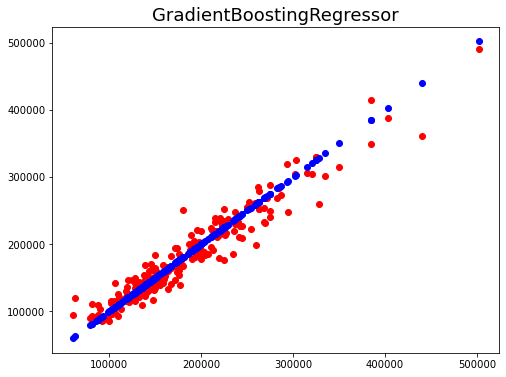

In [266]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions,color='r')
plt.scatter(y_test,y_test,color='b')
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [285]:
import pickle
filename="GBRoutHousecostPred.pkl"
pickle.dump(GBR,open(filename,"wb"))

In [286]:
fit_model=pickle.load(open("GBRoutHousecostPred.pkl","rb"))

In [287]:
predictions=fit_model.predict(Datatest_OHE)

In [288]:
predictions = pd.DataFrame(predictions,columns=['Predications'])

In [289]:
Test_Pred = pd.concat([df_test['Id'],predictions],axis=1)
Test_Pred

,Id,Predications
0,337,339595.590268
1,1018,217692.138817
2,929,248059.447739
3,1148,175010.926099
4,1227,229176.582691
...,...,...
287,83,232104.919165
288,1048,150307.841462
289,17,154259.043383
290,523,138702.735629
